# Time domain baseline correction (NMR)

Here we chow how to baseline correct dataset in the time domain before applying FFT.

The example spectra were downloaded from [this page](
http://anorganik.uni-tuebingen.de/klaus/nmr/processing/index.php?p=dcoffset/dcoffset) where you can find some
explanations on this kind of process.

In [1]:
import spectrochempy as scp

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.2.17rc1.dev2© Copyright 2014-2021 - A.Travert & C.Fernandez @ LCS


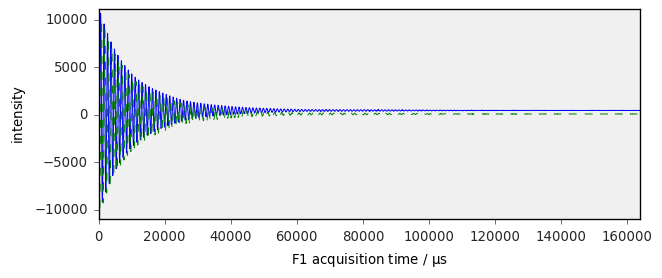

In [2]:
path = scp.preferences.datadir / "nmrdata" / "bruker" / "tests" / "nmr" / "h3po4"
fid = scp.read_topspin(path, expno=4)
prefs = fid.preferences
prefs.figure.figsize = (7, 3)
_ = fid.plot(show_complex=True)

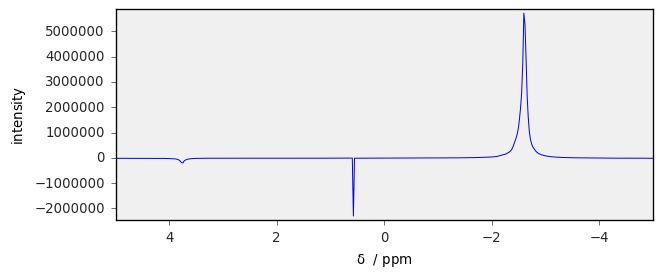

In [3]:
spec = scp.fft(fid)
_ = spec.plot(xlim=(5, -5))

We can see that in the middle of the spectrum there are an artifact (a transmitter spike)
due to different DC offset between imaginary.

In SpectroChemPy, for now, we provide a simple kind of dc correction using the `dc`command.

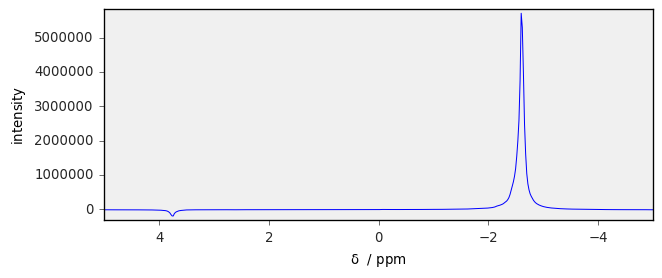

In [4]:
dc_corrected_fid = fid.dc()
spec = scp.fft(dc_corrected_fid)
_ = spec.plot(xlim=(5, -5))

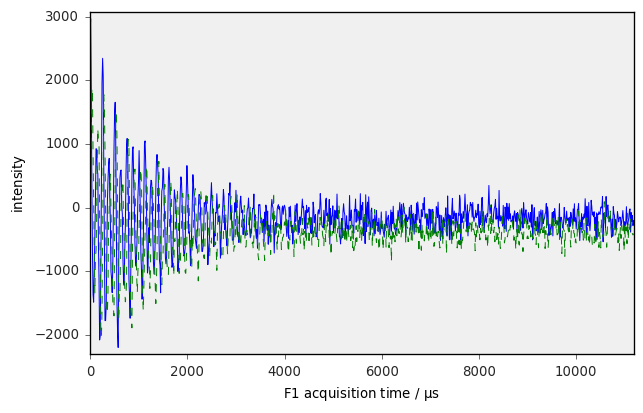

In [5]:
path = scp.preferences.datadir / "nmrdata" / "bruker" / "tests" / "nmr" / "cadmium"
fid2 = scp.read_topspin(path, expno=100)
_ = fid2.plot(show_complex=True)

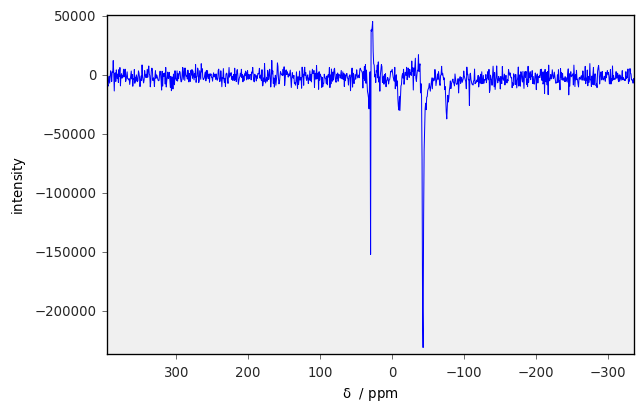

In [6]:
spec2 = scp.fft(fid2)
_ = spec2.plot()

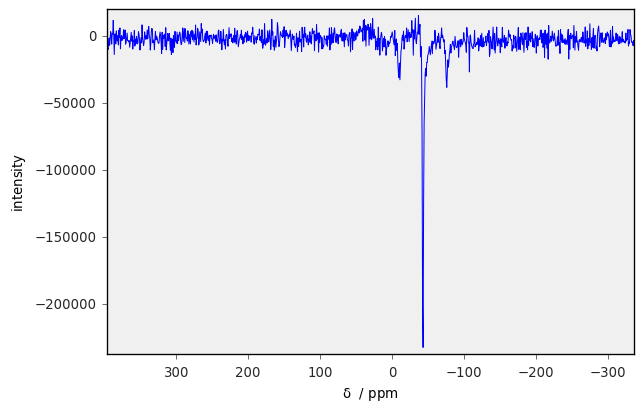

In [7]:
dc_corrected_fid2 = fid2.dc()
spec2 = scp.fft(dc_corrected_fid2)
_ = spec2.plot()